In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score

In [34]:
# Load data
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

In [35]:
# 7000 data with 300 features
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7000, 300)
(7000,)
(3000, 300)


In [36]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


# Q1

In [37]:
def cross_validation(x_train, y_train, k=5):
    
    # Do not modify the function name and always take 'x_train, y_train, k' as the inputs.
    indices = np.arange(len(x_train))
    
    # use random seed to mak each samele at anytime is different.
    np.random.seed()
    np.random.shuffle(indices)
    folds = np.array_split(indices, k)
    folds = np.array(folds)

    k_fold = []
    for i in range(k):
        train_fold = np.delete(np.arange(k), i)
        k_fold.append([np.concatenate((folds[train_fold]), axis=None), folds[i]])
    return k_fold

In [38]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

# K-Fold Example

In [39]:
from sklearn.model_selection import KFold

X = np.arange(20)

kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 17 19], Validation index: [ 4  6  8 18]
Split: 2, Training index: [ 0  1  2  3  4  6  7  8 10 11 13 15 16 17 18 19], Validation index: [ 5  9 12 14]
Split: 3, Training index: [ 1  3  4  5  6  7  8  9 11 12 13 14 15 17 18 19], Validation index: [ 0  2 10 16]
Split: 4, Training index: [ 0  2  3  4  5  6  7  8  9 10 12 14 15 16 17 18], Validation index: [ 1 11 13 19]
Split: 5, Training index: [ 0  1  2  4  5  6  8  9 10 11 12 13 14 16 18 19], Validation index: [ 3  7 15 17]


In [40]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Q2

In [41]:
# (Example) Using SVC from sklearn

clf = SVC(C=1.0, gamma=0.01, kernel='rbf')

In [42]:
best_c, best_gamma = None, None

# TODO HERE
kfold_data = cross_validation(x_train, y_train, k=5)
C = [20, 50, 100 ,200 ]
gamma = [0.0001, 0.0005, 0.001 , 0.003]
# k-Flod Cross Validation and Grid Search
average_scores = np.zeros((len(C), len(gamma)))
best_score = 0
best_model = None
best_c = 0
best_gamma = 0
for i in range(len(C)):
    for j in range(len(gamma)):
        score = 0

        # use cross validation data to train and evaluate the model performance
        for traing_idx, validation_idx in kfold_data:
            clf = SVC(C=C[i], kernel='rbf', gamma=gamma[j])
            clf.fit(x_train[traing_idx], y_train[traing_idx])
            score += clf.score(x_train[validation_idx], y_train[validation_idx])

        average_scores[i][j] = score / len(kfold_data)
        
        # record the best model
        if average_scores[i][j] > best_score:
            best_score = average_scores[i][j]
            best_model = clf
            best_c = C[i]
            best_gamma = gamma[j]

best_parameters=(best_c, best_gamma)

In [43]:
print("(best_c, best_gamma) is ", best_parameters)

(best_c, best_gamma) is  (20, 0.0001)


# Q3

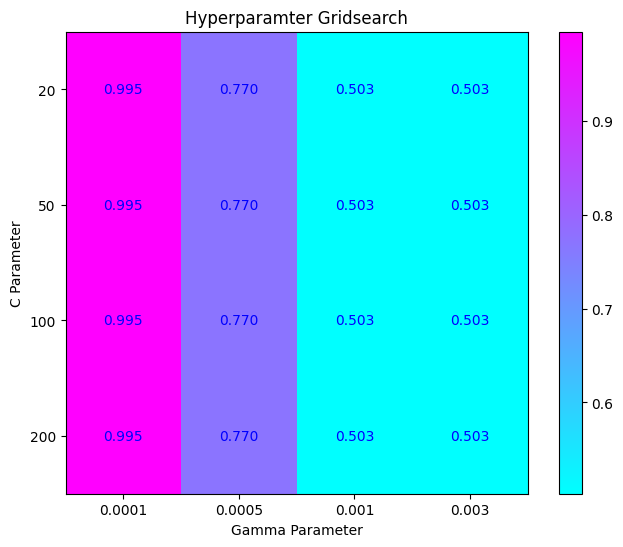

In [44]:
# Plot the grid search results of your SVM
len_C = len(C)
len_gamma = len(gamma)

plt.figure(figsize=(8, 6))
plt.imshow(average_scores, cmap='cool', interpolation='nearest')
plt.xticks(np.arange(len_gamma), gamma)
plt.yticks(np.arange(len_C), C)
plt.xlabel("Gamma Parameter")
plt.ylabel("C Parameter")
plt.title("Hyperparamter Gridsearch")
plt.colorbar()

# add validation score to the heatmap
for i in range(len_C):
    for j in range(len_gamma):
        plt.text(j, i, f'{average_scores[i][j]:.3f}', ha='center', va='center', color='b')

plt.show()

## Q4

In [45]:
# Do Not Modify Below

best_model = SVC(C=best_parameters[0], gamma=best_parameters[1], kernel='rbf')
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)

print("Accuracy score: ", accuracy_score(y_pred, y_test))

# If your accuracy here > 0.9 then you will get full credit (20 points).

Accuracy score:  0.995
